# EXERCISE-1

## 1. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [2]:
import numpy as np

def myFnLinReg(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x**2)
    sum_xy = np.sum(x * y)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)
    b = (sum_y - m * sum_x) / n
    
    return m, b

## 2. Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 2\\mtcars.csv")
X = df['wt']
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
m, b = myFnLinReg(X_train, y_train)

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Slope (m): -5.336941400557047
Intercept (b): 36.9373103135183


## 3. What is the mpg of a car, whose weight is 5.5?

In [4]:
weight = 5.5
predicted_mpg = m * weight + b
print(f"Predicted mpg for a car with weight 5.5: {predicted_mpg}")

Predicted mpg for a car with weight 5.5: 7.584132610454546


## 4. Compute and print accuracy measures such as RMSE and R2  for the test set.

In [5]:
from sklearn.metrics import mean_squared_error, r2_score  
y_pred = m * X_test + b
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 3.5321361326991387
R²: 0.6879761857596274


## 5. Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function

### STOCHASTIC GRADIENT DESCENT

Final Parameters (Theta): [19.88893294 -4.58480541]
Final Cost: 900.0015194294924


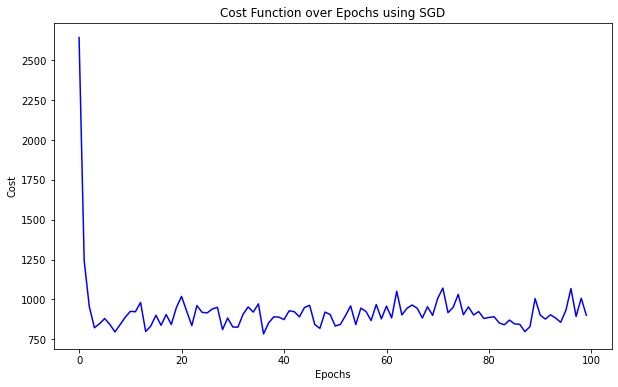

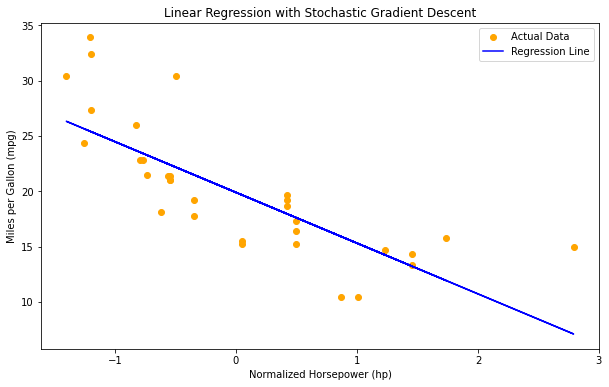

In [7]:
X = df['hp'].values
y = df['mpg'].values
X = (X - X.mean()) / X.std()

theta = np.random.randn(2, 1) 
learning_rate = 0.01
n_epochs = 100
m = len(X)

X_b = np.c_[np.ones((m, 1)), X]  

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors**2)
    return cost
def stochastic_gradient_descent(X, y, theta, learning_rate, n_epochs):
    cost_history = []  
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]  
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history
theta_final, cost_history = stochastic_gradient_descent(X_b, y, theta, learning_rate, n_epochs)
print(f"Final Parameters (Theta): {theta_final.flatten()}")
print(f"Final Cost: {cost_history[-1]}")
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), cost_history, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs using SGD')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data', color='orange')
plt.plot(X, X_b.dot(theta_final), color='blue', label='Regression Line')
plt.xlabel('Normalized Horsepower (hp)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Linear Regression with Stochastic Gradient Descent')
plt.legend()
plt.show()

### MINI BATCH GRADIENT DESCENT

Final Parameters (Theta): [17.37341594 -3.99334963]
Final Cost: 936.3046548406865


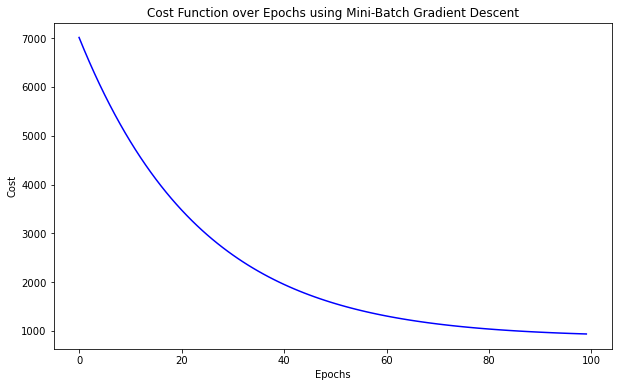

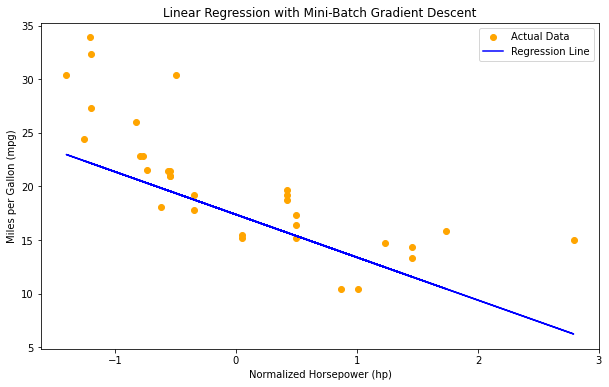

In [8]:
X = df['hp'].values
y = df['mpg'].values
X = (X - X.mean()) / X.std()
theta = np.random.randn(2, 1)  
learning_rate = 0.01
n_epochs = 100
batch_size = 32  
m = len(X)
X_b = np.c_[np.ones((m, 1)), X]  
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors**2)
    return cost
def mini_batch_gradient_descent(X, y, theta, learning_rate, n_epochs, batch_size):
    cost_history = []  
    for epoch in range(n_epochs):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i + batch_size]  
            yi = y_shuffled[i:i + batch_size].reshape(-1, 1) 
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi) / batch_size
            theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history
theta_final, cost_history = mini_batch_gradient_descent(X_b, y, theta, learning_rate, n_epochs, batch_size)

print(f"Final Parameters (Theta): {theta_final.flatten()}")
print(f"Final Cost: {cost_history[-1]}")
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), cost_history, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs using Mini-Batch Gradient Descent')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data', color='orange')
plt.plot(X, X_b.dot(theta_final), color='blue', label='Regression Line')
plt.xlabel('Normalized Horsepower (hp)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Linear Regression with Mini-Batch Gradient Descent')
plt.legend()
plt.show()

# EXERCISE- 2

## 1. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’. 

In [14]:
import pandas as pd
import seaborn as sns
boston_df = pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 2\\Boston.csv")
boston_df.columns = boston_df.columns.str.strip()
correlation_matrix = boston_df.corr()
top_5_features = correlation_matrix['medv'].sort_values(ascending=False).head(6)  
print(top_5_features)

medv     1.000000
rm       0.695360
zn       0.360445
black    0.333461
dis      0.249929
chas     0.175260
Name: medv, dtype: float64


Top 5 Correlated Features:
 lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
Name: medv, dtype: float64


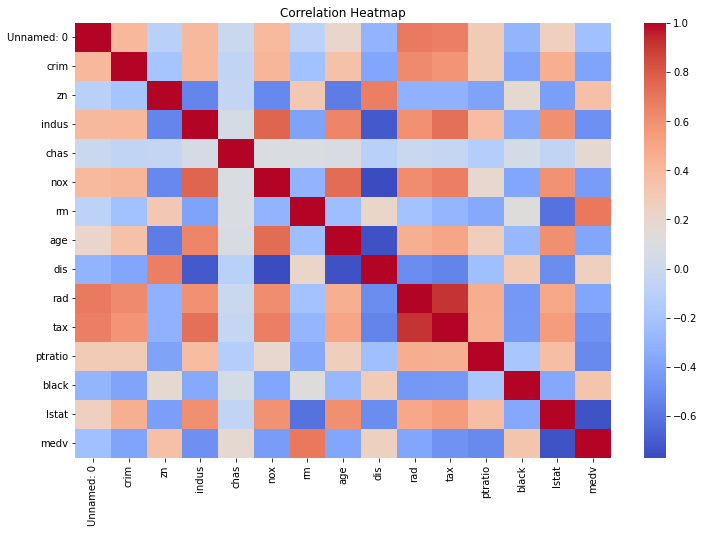

In [15]:
correlation_matrix = boston_df.corr()
top_5_corr_features = correlation_matrix['medv'].abs().sort_values(ascending=False)[1:6]#from index 1 bcz at 0 its medv itself
print("Top 5 Correlated Features:\n", top_5_corr_features)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 2. Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3 features.  (from sklearn.linear_model import LinearRegression) 
## 3. Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

In [22]:
top_3_features = correlation_matrix['medv'].sort_values(ascending=False).head(4)  
print(top_3_features)

medv     1.000000
rm       0.695360
zn       0.360445
black    0.333461
Name: medv, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
top_3_corr_features = correlation_matrix['medv'].abs().sort_values(ascending=False)[1:4]
top_3_features = top_3_corr_features.index.tolist()
X = boston_df[top_3_features]
y = boston_df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model built")

Model built


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score (Accuracy): {r2:.2f}")

Model Coefficients: [-0.56712588  4.93311836 -0.86709475]
Intercept: 14.58809926157107
Mean Squared Error (MSE): 27.11
R² Score (Accuracy): 0.63
